# Initial exploratory data analysis

- We start with testing out the weather data we've obtained.
- Taking a look at how we can use KMeans clustering to group cities for our recommender.
- 

## 1. Adjusting the weather data
### 1.1 Imporint modules and looking for missing values/unusual data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
weather = pd.read_json("../data/Seasonal_weather_data.json")

In [3]:
weather.head()

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
0,Amsterdam,85,14,7,17.0,98.0,49,13,5,15.0,...,64,21,12,13.0,203.0,60,6,1,16.0,59.0
1,Athens,37,23,16,8.0,212.0,27,20,12,9.0,...,6,31,22,2.0,347.0,51,14,8,13.0,131.0
2,Belgrade,48,18,8,7.0,153.0,60,18,8,9.0,...,69,26,16,8.0,266.0,50,5,-1,8.0,74.0
3,Berlin,44,13,6,9.0,109.0,45,13,4,9.0,...,63,23,12,10.0,219.0,45,3,-2,10.0,55.0
4,Bern,79,13,5,9.0,119.0,87,13,3,12.0,...,113,23,11,11.0,213.0,64,3,-3,10.0,64.0


In [4]:
weather.isna().sum()

city                0
autumn_prec_mm      0
autumn_high         0
autumn_low          0
autumn_prec_days    1
autumn_sun_hrs      1
spring_prec_mm      0
spring_high         0
spring_low          0
spring_prec_days    1
spring_sun_hrs      1
summer_prec_mm      0
summer_high         0
summer_low          0
summer_prec_days    1
summer_sun_hrs      1
winter_prec_mm      0
winter_high         0
winter_low          0
winter_prec_days    1
winter_sun_hrs      1
dtype: int64

### 1.2 We've found a cities with missing data, because our MVP is concerned with functionality and not encompassing all cities, we will delete any cities that are missing data.

In [5]:
# Finding the index for Monaco, because it has no data
weather.loc[weather["autumn_prec_days"].isna()]

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
17,Monaco,0,0,0,NaN,NaN,0,0,0,NaN,...,0,0,0,NaN,NaN,0,0,0,NaN,NaN


### 1.3 We picked 2 features ("summer_high") to get a quick overview of our cities.

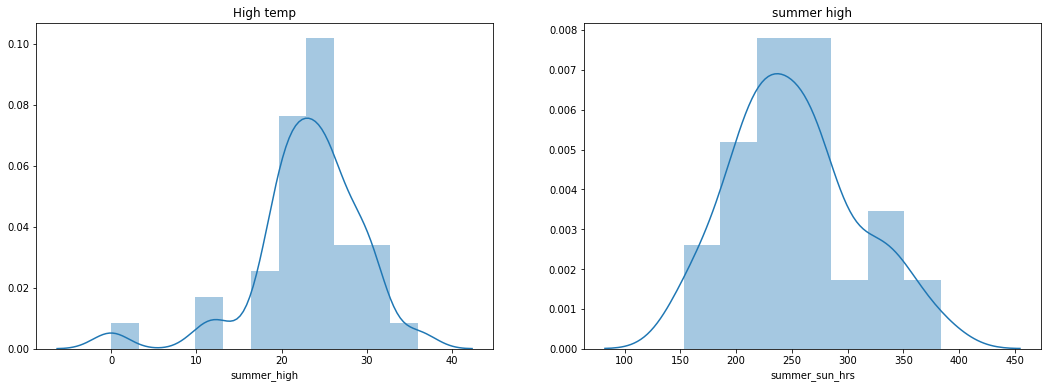

In [6]:
# Checking the spread of our data

fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(18,6))

sns.distplot(weather["summer_high"], ax=ax[0]);
ax[0].set_title("High temp");

sns.distplot(weather["summer_sun_hrs"], ax=ax[1]);
ax[1].set_title("sunshine hours");

plt.title("summer high");

The distribution plots do not offer much information, save for some outliers, but this is not so useful for us. So we ordered the data by summer high temperatures. As we can see, Monaco has no data so it will be dropped. We also found that the data for Prague is suspicious and after some research saw that these temperatures were unreliable. Hence, we will drop Prague from our MVP.

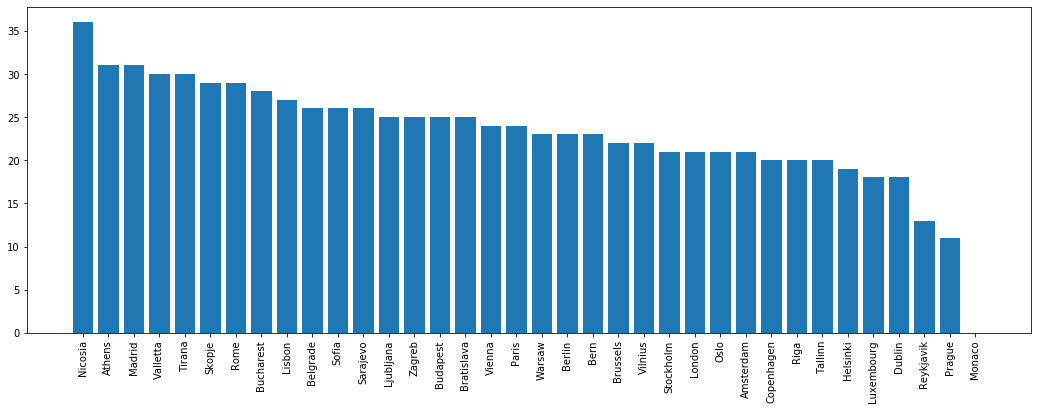

In [7]:
# Checking the average high summer temperatures

summer_high_desc = weather.sort_values("summer_high", ascending=False)

plt.subplots(figsize=(18,6))
plt.bar(summer_high_desc["city"], summer_high_desc["summer_high"])
plt.xticks(rotation="vertical");


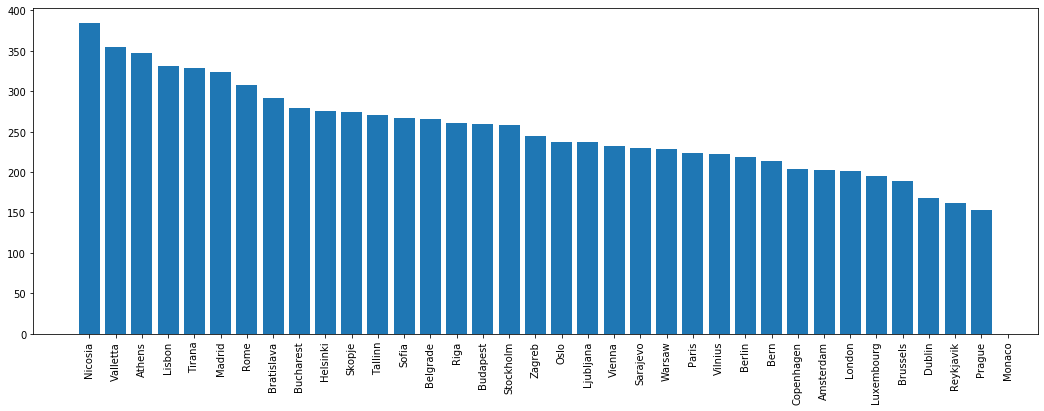

In [8]:
# Checking the average number of sunshine hours in summer

summer_sun_desc = weather.sort_values("summer_sun_hrs", ascending=False)

plt.subplots(figsize=(18,6))
plt.bar(summer_sun_desc["city"], summer_sun_desc["summer_sun_hrs"])
plt.xticks(rotation="vertical");


In [9]:
# Finding the index for Prague, because the data is inaccurate
weather.loc[weather["city"] == "Prague"]

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
21,Prague,75,19,8,10.0,215.0,24,4,-3,6.0,...,35,11,1,7.0,153.0,40,7,0,8.0,106.0


In [10]:
# Dropping Monaco (17) and Prague (21)
weather = weather.drop(weather.index[[17,21]]).reset_index(drop=True)

## 2. Correlations and subsetting

### 2.1 Now that we have the city list we want (no missing or unusual data), we can subset the dataset for the columns we want.

#### We first started by looking for correlations that may offer insights in what we could drop.

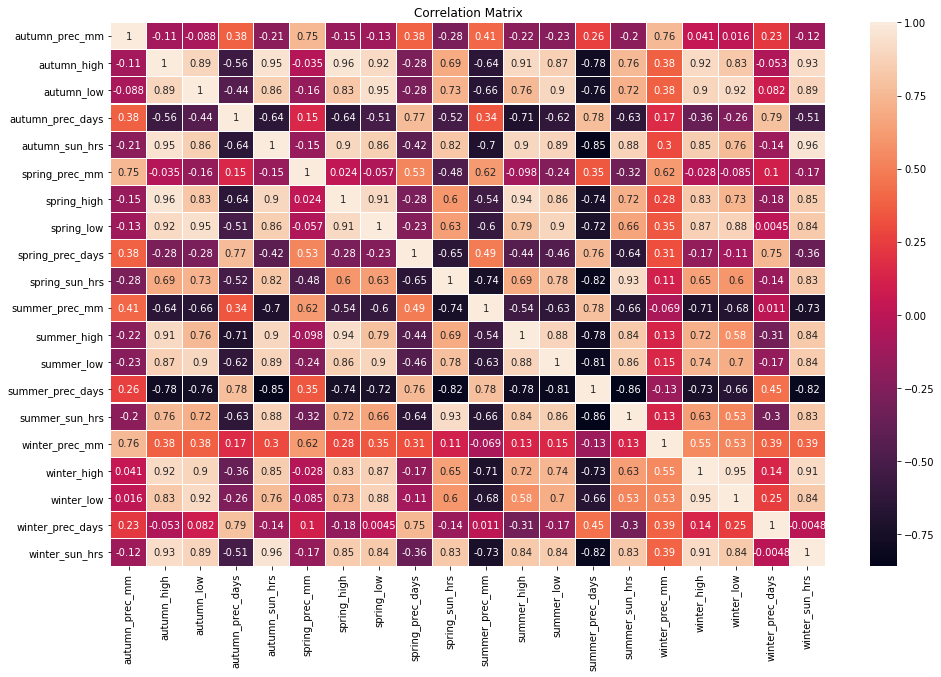

In [11]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(weather.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

### 2.2 The heatmap is not very helpful, so we used our own discretion on which columns to keep. 

#### There are some obvious correlations, e.g. higher summer temperatures, usually mean higher temperatures for all other seasons. However, we also wanted to see if anything unusual would come up that we needed to consider.
#### So we created a heatmap for the subset of the data.

In [12]:
weather.columns

Index(['city', 'autumn_prec_mm', 'autumn_high', 'autumn_low',
       'autumn_prec_days', 'autumn_sun_hrs', 'spring_prec_mm', 'spring_high',
       'spring_low', 'spring_prec_days', 'spring_sun_hrs', 'summer_prec_mm',
       'summer_high', 'summer_low', 'summer_prec_days', 'summer_sun_hrs',
       'winter_prec_mm', 'winter_high', 'winter_low', 'winter_prec_days',
       'winter_sun_hrs'],
      dtype='object')

- We will keep the '_high', '_prec_days' and '_sun_hrs' columns for each season. 
- The reason we drop '_low' is because this usually refers to nighttime temperatures and we thought users may be more interested in the temperatures of cities during the day.
- We will drop '_prec_mm' because we already have the precipitation days for each season and this may be easier for users to imagine when they consider city weather than precipitation in mm.

In [13]:
weather_set = weather[['city', 
                       'autumn_high', 'autumn_prec_days', 'autumn_sun_hrs', 
                       'spring_high', 'spring_prec_days', 'spring_sun_hrs',
                       'summer_high', 'summer_prec_days', 'summer_sun_hrs', 
                       'winter_high', 'winter_prec_days', 'winter_sun_hrs']]

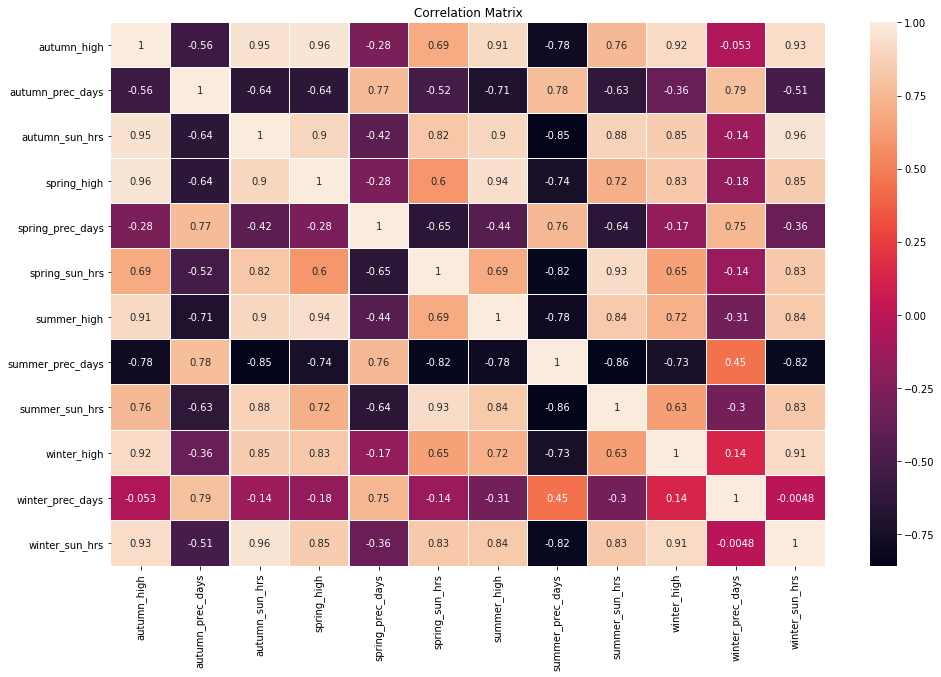

In [14]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(weather_set.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

The heatmap does not show any unusual correlations.

## 3. KMeans Clustering

Our MVP is based on KMeans clustering, which takes the user input (city, weather preference) and outputs a list of similar cities that the user may be interested in, whether for holiday or to move to. After the weather data functionality works, we plan to add socio-economic data, then the data for venues.

### 3.1 Creating an elbow plot function to determine optimal number of clusters.
The function takes two features at a time, because we would rather set a static number of clusters, we decided to check which is the average optimal number across a few pairs of features. Namely:

- average summers
- average winters
- average cold season precipitation
- average warm season sun hours

In [15]:
def plot_elbow(X):
    inertias = {}
    for k in range(1,15):
        cl = KMeans(n_clusters=k).fit(X)
        inertias[k] = cl.inertia_

    plt.figure(figsize=(10,6))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters")

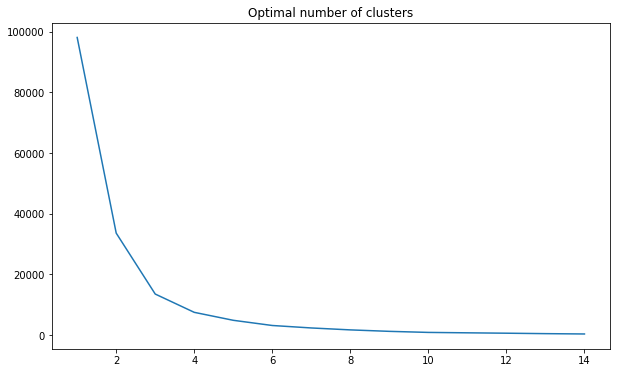

In [16]:
# optimal cluster numbers for average summers = 4
plot_elbow(weather_set[["summer_high", "summer_sun_hrs"]])

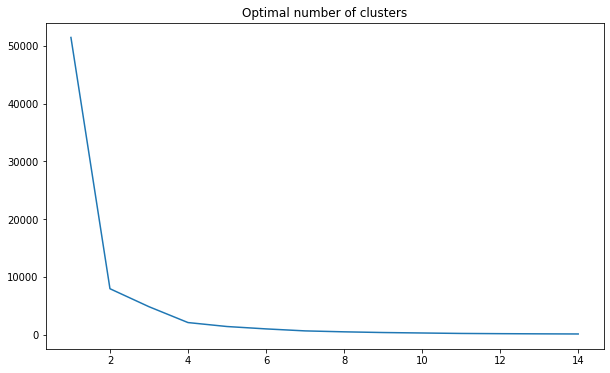

In [17]:
# optimal cluster numbers for average winters = 4
plot_elbow(weather_set[["winter_sun_hrs", "winter_high"]])

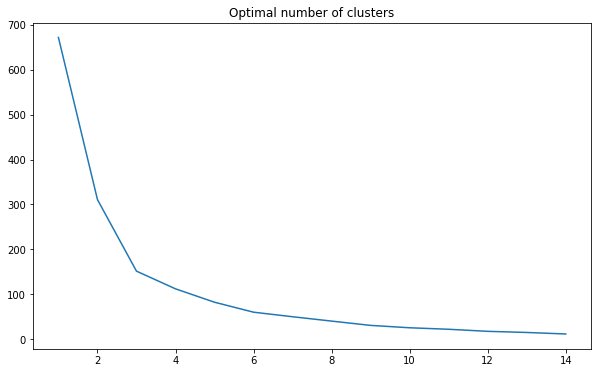

In [18]:
# optimal cluster numbers for average cold season precipitation = 3
plot_elbow(weather_set[["autumn_prec_days", "winter_prec_days"]])

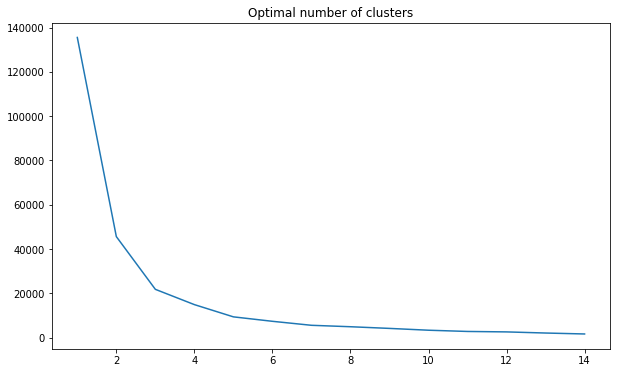

In [19]:
# optimal cluster numbers for average warm season sun hours = 5
plot_elbow(weather_set[["spring_sun_hrs", "summer_sun_hrs"]])

We decided to go with 4 clusters for our MVP (the average of the optimal clusters from above is 4).

### 3.2 We first tested out the clustering for summer sun hours and summer high temperatures, then checked to see if the cities were actually similar.

In [20]:
# Getting the KMeans clusters for our 2 features

X = weather_set[["summer_sun_hrs", "summer_high"]]
clusters = KMeans(n_clusters=4)
clusters.fit(X)

KMeans(n_clusters=4)

In [21]:
# Assigning values to the clusters

clusters.predict(X)
X.assign(cluster=clusters.predict(X)).head()

,summer_sun_hrs,summer_high,cluster
0,203.0,21,3
1,347.0,31,1
2,266.0,26,2
3,219.0,23,0
4,213.0,23,0


### 3.3 Using a scatterplot to see how the clusters are distributed

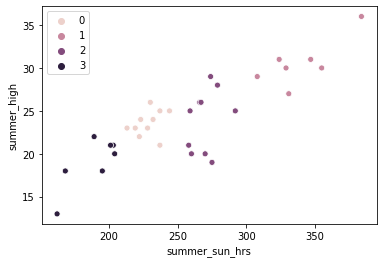

In [22]:
sns.scatterplot(data=X,
                x="summer_sun_hrs",
                y="summer_high",
                hue=clusters.predict(X));

We actually need the city names again in order to see if our clustering makes sense (and if the data is accurate).

In [23]:
summer_clu = weather_set.assign(cluster=clusters.predict(X))
summer_clu[["city", "cluster"]].head()

,city,cluster
0,Amsterdam,3
1,Athens,1
2,Belgrade,2
3,Berlin,0
4,Bern,0


In [24]:
cluster0 = summer_clu.loc[summer_clu["cluster"] == 0]
clu_0 = list(cluster0["city"])

In [25]:
cluster1 = summer_clu.loc[summer_clu["cluster"] == 1]
clu_1 = list(cluster1["city"])

In [26]:
cluster2 = summer_clu.loc[summer_clu["cluster"] == 2]
clu_2 = list(cluster2["city"])

In [27]:
cluster3 = summer_clu.loc[summer_clu["cluster"] == 3]
clu_3 = list(cluster3["city"])

These are the clusters for summer in terms of sunshine hours and high temperatures. Cities are grouped by the most similar summers. We did some research on a few cities and we are happy with how the clusters were assigned.

In [28]:
print(clu_0)
print("--------------------------------------------------------------------------------------------")
print(clu_1)
print("--------------------------------------------------------------------------------------------")
print(clu_2)
print("--------------------------------------------------------------------------------------------")
print(clu_3)

['Berlin', 'Bern', 'Ljubljana', 'Oslo', 'Paris', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Reykjavik']


## 4. Testing other feature pairs
### 4.1 We first have a function that will produce scatterplots for a quick overview of clusters. We'll start with average winters, then do the other 2 feature pairs.

In [29]:
def plot_clusters(df, col1, col2, cluster_no):
    X = df[[col1, col2]]
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2 = df2[["city", "cluster"]]
    
    sns.scatterplot(data=X,
                x=col1,
                y=col2,
                hue=clusters.predict(X));

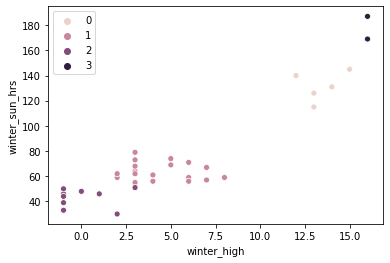

In [30]:
plot_clusters(weather_set, "winter_high", "winter_sun_hrs", 4)

### 4.2 Next step is the function which takes 2 features and prints a list of the city clusters.

In [31]:
# function prints the list of cities in their cluster groups

def get_city_list_one(df):
    
    cluster0 = (df.loc[df["cluster"] == 0])
    clu_0 = list(cluster0["city"])
    
    cluster1 = (df.loc[df["cluster"] == 1])
    clu_1 = list(cluster1["city"])
    
    cluster2 = (df.loc[df["cluster"] == 2])
    clu_2 = list(cluster2["city"])
    
    cluster3 = (df.loc[df["cluster"] == 3])
    clu_3 = list(cluster3["city"])
    
    print(clu_0)
    print("--------------------------------------------------------------------------------------------")
    print(clu_1)
    print("--------------------------------------------------------------------------------------------")
    print(clu_2)
    print("--------------------------------------------------------------------------------------------")
    print(clu_3)

In [32]:
def check_clusters(df, col1, col2):
    # creates new df of two features on which to perfom
    # KMeans clustering
    X = df[[col1, col2]]
    clusters = KMeans(n_clusters=4)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2 = df2[["city", "cluster"]]
    
    get_city_list_one(df2)
    

In [33]:
check_clusters(weather_set, "winter_high", "winter_sun_hrs")

['Copenhagen', 'Helsinki', 'Oslo', 'Reykjavik', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Paris', 'Sarajevo', 'Skopje', 'Sofia', 'Vienna', 'Zagreb']
--------------------------------------------------------------------------------------------
['Nicosia', 'Valletta']


### 4.3 We'll check the clusters for our other feature pairs.

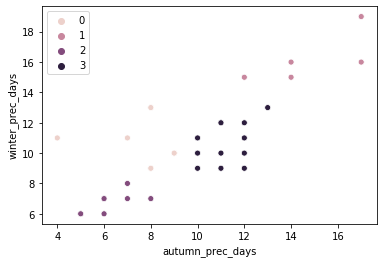

In [34]:
# Clusters for cold season precipitation
plot_clusters(weather_set, "autumn_prec_days", "winter_prec_days", 4)

In [35]:
check_clusters(weather_set, "autumn_prec_days", "winter_prec_days")

['Brussels', 'Copenhagen', 'Dublin', 'Helsinki', 'Oslo', 'Reykjavik', 'Riga', 'Sarajevo', 'Stockholm', 'Tallinn', 'Tirana', 'Vilnius']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Madrid', 'Skopje', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Amsterdam', 'London', 'Luxembourg', 'Paris', 'Vienna']
--------------------------------------------------------------------------------------------
['Athens', 'Berlin', 'Bern', 'Lisbon', 'Ljubljana', 'Nicosia', 'Rome', 'Sofia', 'Valletta']


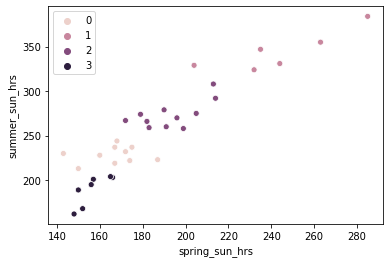

In [36]:
# Clusters for warm season sunshine hours
plot_clusters(weather_set, "spring_sun_hrs", "summer_sun_hrs", 4)

In [37]:
check_clusters(weather_set, "spring_sun_hrs", "summer_sun_hrs")

['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Riga', 'Rome', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn']
--------------------------------------------------------------------------------------------
['Berlin', 'Bern', 'Ljubljana', 'Oslo', 'Paris', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Reykjavik']


We did some research (googling weather data and seasonal temperatures, precipitation and sunshine hours)to confirm that these clusters make sense. We are happy with the groupings and will continue to develop our MVP in the next notebook `City_recommender_MVP`.

## 5. Socio-economic Data
### 5.1 We will check the socio-economic to see if we can find correlations and create feature pairs.

In [38]:
socio_ec = pd.read_json("../data/Socio_economic_data.json")

In [39]:
socio_ec.head()

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life,climate_level,cost_of_living_level,health_care_level,pollution_level,property_income_ratio_level,purchasing_power_level,safety_level,traffic_time_level,quality_of_life_level
0,Amsterdam,87.45,84.18,69.45,30.79,10.98,81.63,67.32,29.88,168.38,Very High,Moderate,High,Low,Moderate,Moderate,High,Low,Very High
1,Andorra-La-Vella,NaN,66.69,69.44,64.08,7.44,82.46,87.16,5.00,NaN,None,Moderate,High,High,Low,Moderate,Very High,Very Low,None
2,Athens,95.18,59.28,56.17,57.30,12.75,40.69,50.49,37.98,119.84,Very High,Low,Moderate,Moderate,High,Very Low,Moderate,Moderate,High
3,Belgrade,84.14,40.49,53.69,63.57,22.22,34.87,62.02,35.89,107.89,Very High,Very Low,Moderate,High,Very High,Very Low,High,Moderate,Moderate
4,Berlin,83.35,67.41,69.68,39.45,9.63,98.54,58.92,34.06,164.83,Very High,Moderate,High,Low,Moderate,High,Moderate,Low,Very High


In [40]:
# Removing non-integer values
socio_ec_data = socio_ec[['city', 'climate', 'cost_of_living', 'health_care', 'pollution',
       'property_income_ratio', 'purchasing_power', 'safety', 'traffic_time',
       'quality_of_life']]

In [41]:
socio_ec_data.isna().sum()

city                     0
climate                  1
cost_of_living           2
health_care              0
pollution                0
property_income_ratio    0
purchasing_power         2
safety                   0
traffic_time             0
quality_of_life          3
dtype: int64

In [42]:
socio_ec_data.loc[socio_ec_data["climate"].isna()]

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
1,Andorra-La-Vella,NaN,66.69,69.44,64.08,7.44,82.46,87.16,5.0,NaN


In [43]:
socio_ec_data.loc[socio_ec_data["cost_of_living"].isna()]

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
20,Monaco,94.90,NaN,71.53,80.23,48.88,NaN,79.26,18.33,NaN
23,Nuuk,24.01,NaN,75.00,70.94,8.29,NaN,72.02,18.75,NaN


In [44]:
socio_ec_data.loc[socio_ec_data["quality_of_life"].isna()]

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
1,Andorra-La-Vella,NaN,66.69,69.44,64.08,7.44,82.46,87.16,5.00,NaN
20,Monaco,94.90,NaN,71.53,80.23,48.88,NaN,79.26,18.33,NaN
23,Nuuk,24.01,NaN,75.00,70.94,8.29,NaN,72.02,18.75,NaN


In [45]:
# Dropping Andorra-La-Vella, Monaco and Nuuk due to limited data
socio_ec_data = socio_ec_data.drop([1,20,23]).reset_index(drop=True)


In [46]:
socio_ec_data.head()

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
0,Amsterdam,87.45,84.18,69.45,30.79,10.98,81.63,67.32,29.88,168.38
1,Athens,95.18,59.28,56.17,57.30,12.75,40.69,50.49,37.98,119.84
2,Belgrade,84.14,40.49,53.69,63.57,22.22,34.87,62.02,35.89,107.89
3,Berlin,83.35,67.41,69.68,39.45,9.63,98.54,58.92,34.06,164.83
4,Bratislava,80.72,50.81,57.17,41.12,13.37,61.82,68.68,30.89,147.54


In [47]:
# Check if there are anymore NaN values
socio_ec_data.isna().sum()

city                     0
climate                  0
cost_of_living           0
health_care              0
pollution                0
property_income_ratio    0
purchasing_power         0
safety                   0
traffic_time             0
quality_of_life          0
dtype: int64

### 5.2 Checking for any correlating features in the socio-economic data

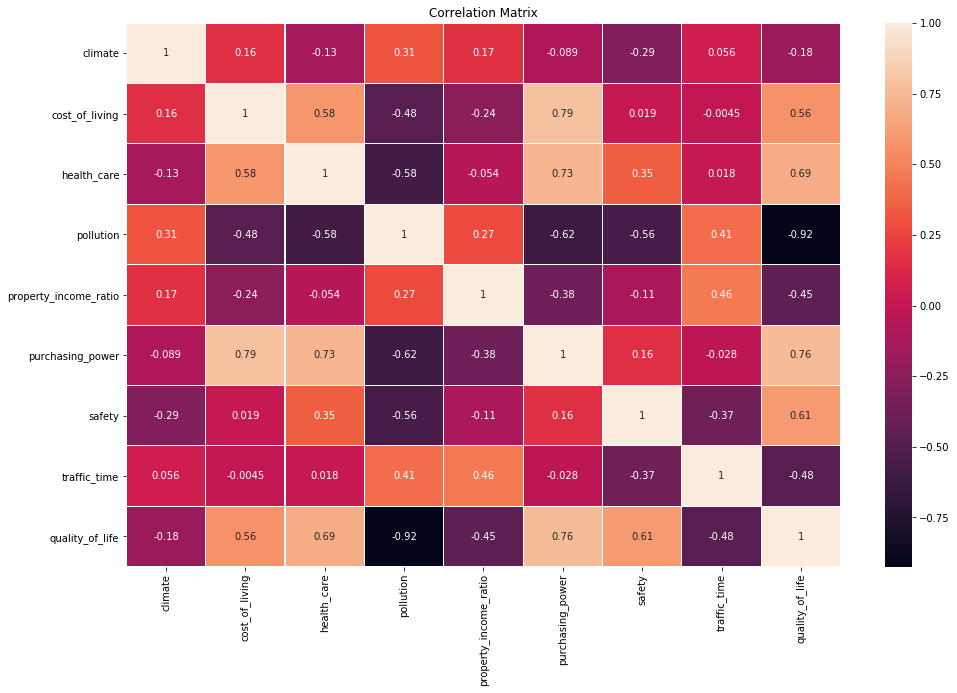

In [48]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(socio_ec_data.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

- Here we can negative correlation between "Pollution" and "Quality of Life".
- There are also positive correlations (+ 0.7) for "Purchasing power" and "Quality of life", "Cost of living" and "Purchasing power", "Health care" and "Purchasing power".

In this case, we do not think it would be wise to drop any columns, because we would like users to be able to pick specific features.

## 6. Testing out socio-ec data
### 6.1 We'll test out single features:
- 'climate'
- 'cost_of_living'
- 'health_care'
- 'pollution'
- 'property_income_ratio'
- 'purchasing_power'
- 'safety'
- 'traffic_time'
- 'quality_of_life'


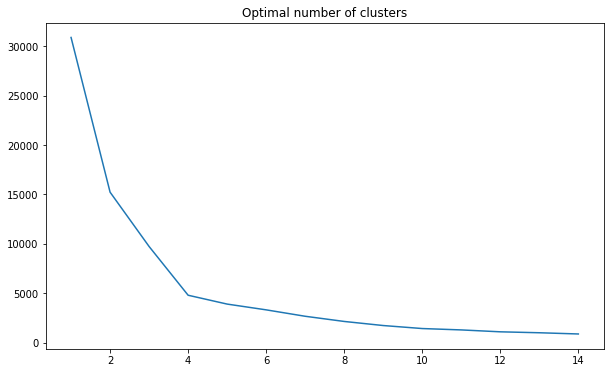

In [49]:
plot_elbow(socio_ec_data[["cost_of_living", "pollution"]])

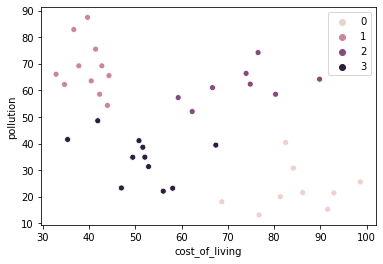

In [50]:
plot_clusters(socio_ec_data, "cost_of_living", "pollution", 4)

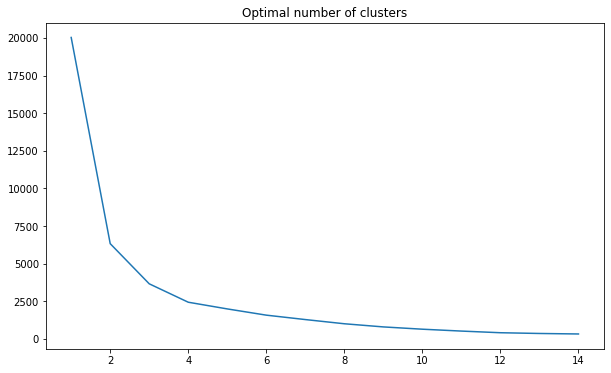

In [51]:
plot_elbow(socio_ec_data[["purchasing_power", "health_care"]])

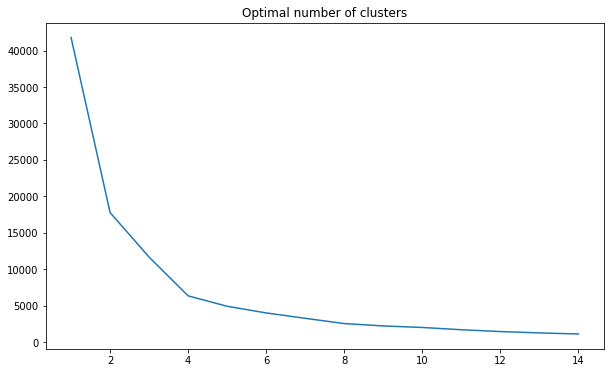

In [52]:
plot_elbow(socio_ec_data[["cost_of_living", "quality_of_life"]])

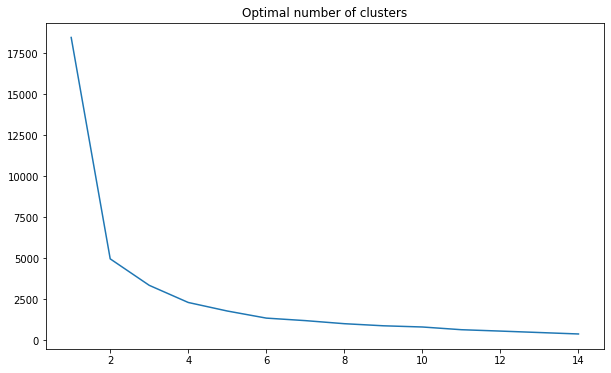

In [53]:
plot_elbow(socio_ec_data[["pollution", "traffic_time"]])

### 6.2 After testing out a few features pairs in elbow plots, it seems the average optimal number of clusters is (thankfully) still 4. So now we'll print out a few cluster groups for the feature pairs we've plotted, to check if they make sense.

In [54]:
check_clusters(socio_ec_data, "cost_of_living", "pollution")

['Berlin', 'Bratislava', 'Lisbon', 'Ljubljana', 'Minsk', 'Podgorica', 'Prague', 'Riga', 'Tallinn', 'Vilnius', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Brussels', 'London', 'Madrid', 'Nicosia', 'Paris', 'Rome', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Copenhagen', 'Dublin', 'Helsinki', 'Luxembourg', 'Oslo', 'Reykjavik', 'Stockholm', 'Vienna']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bucharest', 'Budapest', 'Chisinau', 'Kiev', 'Moscow', 'Sarajevo', 'Skopje', 'Sofia', 'Tirana', 'Warsaw']


In [55]:
check_clusters(socio_ec_data, "purchasing_power", "health_care")

['Athens', 'Belgrade', 'Chisinau', 'Kiev', 'Minsk', 'Podgorica', 'Skopje', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Brussels', 'Copenhagen', 'Helsinki', 'London', 'Luxembourg', 'Oslo', 'Reykjavik', 'Stockholm', 'Vienna']
--------------------------------------------------------------------------------------------
['Bratislava', 'Bucharest', 'Budapest', 'Dublin', 'Moscow', 'Nicosia', 'Riga', 'Rome', 'Sarajevo', 'Sofia', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Lisbon', 'Ljubljana', 'Madrid', 'Paris', 'Prague', 'Tallinn', 'Vilnius']


In [56]:
check_clusters(socio_ec_data, "cost_of_living", "quality_of_life")

['Berlin', 'Bratislava', 'Lisbon', 'Ljubljana', 'Madrid', 'Prague', 'Riga', 'Tallinn', 'Vilnius', 'Zagreb']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bucharest', 'Budapest', 'Chisinau', 'Kiev', 'Minsk', 'Moscow', 'Podgorica', 'Sarajevo', 'Skopje', 'Sofia', 'Tirana', 'Warsaw']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Copenhagen', 'Helsinki', 'Luxembourg', 'Oslo', 'Reykjavik', 'Stockholm', 'Vienna']
--------------------------------------------------------------------------------------------
['Athens', 'Brussels', 'Dublin', 'London', 'Nicosia', 'Paris', 'Rome', 'Valletta']


In [57]:
check_clusters(socio_ec_data, "pollution", "traffic_time")

['Copenhagen', 'Helsinki', 'Ljubljana', 'Luxembourg', 'Oslo', 'Reykjavik', 'Stockholm', 'Tallinn', 'Vienna', 'Vilnius']
--------------------------------------------------------------------------------------------
['Athens', 'Belgrade', 'Brussels', 'Budapest', 'Chisinau', 'Kiev', 'London', 'Madrid', 'Moscow', 'Nicosia', 'Paris', 'Rome', 'Warsaw']
--------------------------------------------------------------------------------------------
['Bucharest', 'Sarajevo', 'Skopje', 'Sofia', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Bratislava', 'Dublin', 'Lisbon', 'Minsk', 'Podgorica', 'Prague', 'Riga', 'Zagreb']


## 7. Exporting updated data
### 7.1 We'd like to combine the data as a sample data set for testing out our MVP.

In [58]:
weather_set.head()

,city,autumn_high,autumn_prec_days,autumn_sun_hrs,spring_high,spring_prec_days,spring_sun_hrs,summer_high,summer_prec_days,summer_sun_hrs,winter_high,winter_prec_days,winter_sun_hrs
0,Amsterdam,14,17.0,98.0,13,15.0,166.0,21,13.0,203.0,6,16.0,59.0
1,Athens,23,8.0,212.0,20,9.0,235.0,31,2.0,347.0,14,13.0,131.0
2,Belgrade,18,7.0,153.0,18,9.0,182.0,26,8.0,266.0,5,8.0,74.0
3,Berlin,13,9.0,109.0,13,9.0,167.0,23,10.0,219.0,3,10.0,55.0
4,Bern,13,9.0,119.0,13,12.0,150.0,23,11.0,213.0,3,10.0,64.0


In [59]:
socio_ec_data.head()

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
0,Amsterdam,87.45,84.18,69.45,30.79,10.98,81.63,67.32,29.88,168.38
1,Athens,95.18,59.28,56.17,57.30,12.75,40.69,50.49,37.98,119.84
2,Belgrade,84.14,40.49,53.69,63.57,22.22,34.87,62.02,35.89,107.89
3,Berlin,83.35,67.41,69.68,39.45,9.63,98.54,58.92,34.06,164.83
4,Bratislava,80.72,50.81,57.17,41.12,13.37,61.82,68.68,30.89,147.54


In [60]:
all_data = weather_set.merge(socio_ec_data, on="city")

### 7.2 The MVP requires latitude and longtitude data in order to plot the cluster groups on a map.

In [61]:
city_list = list(all_data.city)
print(city_list)

['Amsterdam', 'Athens', 'Belgrade', 'Berlin', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Helsinki', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Madrid', 'Nicosia', 'Oslo', 'Paris', 'Reykjavik', 'Riga', 'Rome', 'Sarajevo', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Tirana', 'Valletta', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']


In [62]:
capitals = pd.read_csv('../data/country-capitals.csv', error_bad_lines=False)
capitals.head()

b'Skipping line 229: expected 6 fields, saw 7\nSkipping line 240: expected 6 fields, saw 7\n'


,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [63]:
european_capitals = (capitals[capitals["CapitalName"].isin(city_list)]
                                                     .reset_index(drop=True)
                                                     .rename(columns={"CapitalName":"city",
                                                                      "CapitalLatitude":"lat",
                                                                      "CapitalLongitude":"lng"}))
european_capitals = european_capitals[["city", "lat", "lng"]]

european_capitals.head()

,city,lat,lng
0,Tirana,41.316667,19.816667
1,Vienna,48.200000,16.366667
2,Brussels,50.833333,4.333333
3,Sarajevo,43.866667,18.416667
4,Sofia,42.683333,23.316667


In [64]:
all_data = all_data.merge(european_capitals, on="city")

In [65]:
all_data.to_json("../data/Combined_data.json")